# Time Series Analysis and Forecasting of Exchange Rates

### Data Preparation and Exploration

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

### Load and Explore Data

In [3]:
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

# Display the first few rows
df.head()


,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


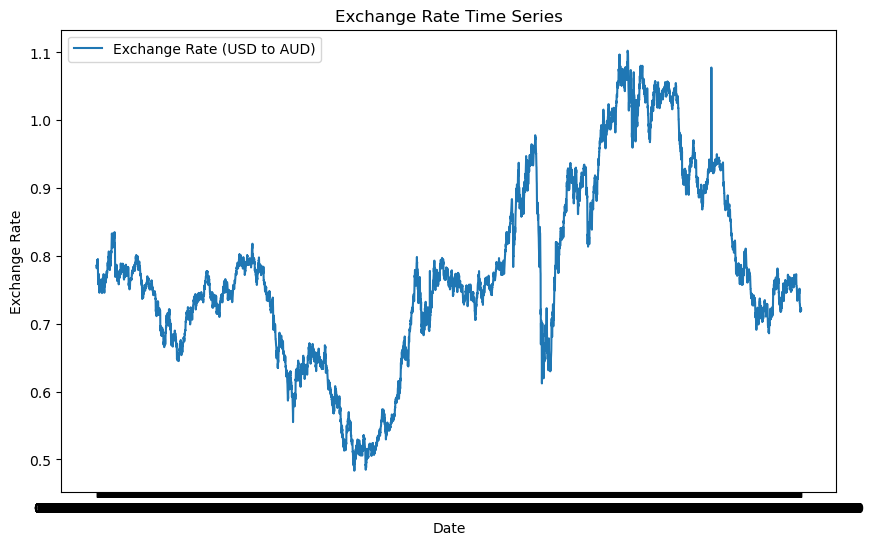

In [5]:
# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(df, label='Exchange Rate (USD to AUD)')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


### Stationarity Check

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974


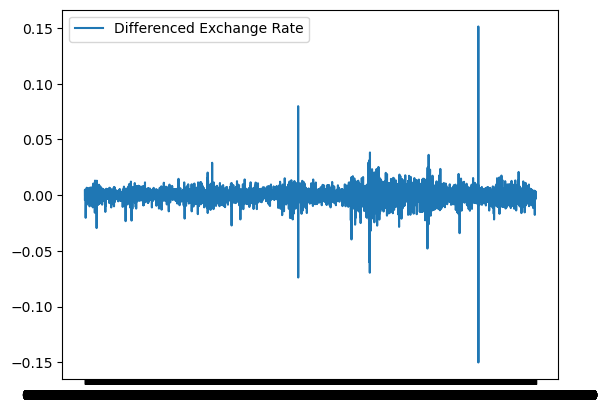

In [6]:
# Augmented Dickey-Fuller test for stationarity
result = adfuller(df['Ex_rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if necessary
if result[1] > 0.05:
    df['Exchange Rate Diff'] = df['Ex_rate'].diff().dropna()
    plt.plot(df['Exchange Rate Diff'], label='Differenced Exchange Rate')
    plt.legend()
    plt.show()

###  ARIMA Model Building

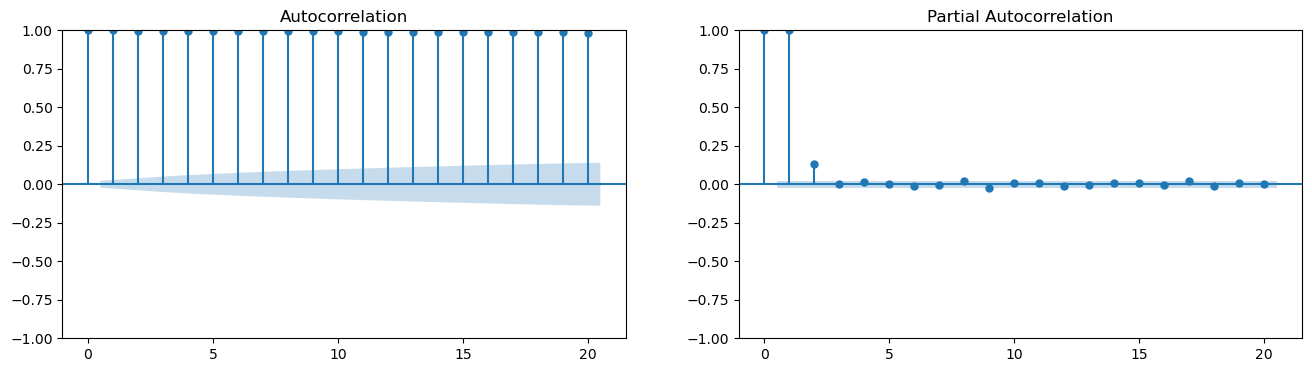

In [9]:
# Plot ACF and PACF to determine p, d, q
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sm.graphics.tsa.plot_acf(df['Ex_rate'].dropna(), lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(df['Ex_rate'].dropna(), lags=20, ax=ax2)
plt.show()

In [10]:
# Fit the ARIMA model (adjust p, d, q as needed)
model_arima = ARIMA(df['Ex_rate'], order=(1, 1, 0))
arima_result = model_arima.fit()
ypred_ar = arima_result.predict(start =1791, end = 1820)
print(arima_result.summary())

C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Mon, 17 Feb 2025   AIC                         -56104.319
Time:                        00:44:36   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [11]:
adfuller(df['Ex_rate'])[1]

0.44923273535979974

In [12]:
# split data
train=df.iloc[:-30]
test=df.iloc[-30:]

In [13]:
model = ARIMA(train['Ex_rate'], order=(1, 1, 0)).fit()

C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
ypred=model.predict(start=7558,end=7587)
ypred

C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.744148
7585    0.744148
7586    0.744148
7587    0.744148
Name: predicted_mean, dtype: float64

### Residual Diagnostics

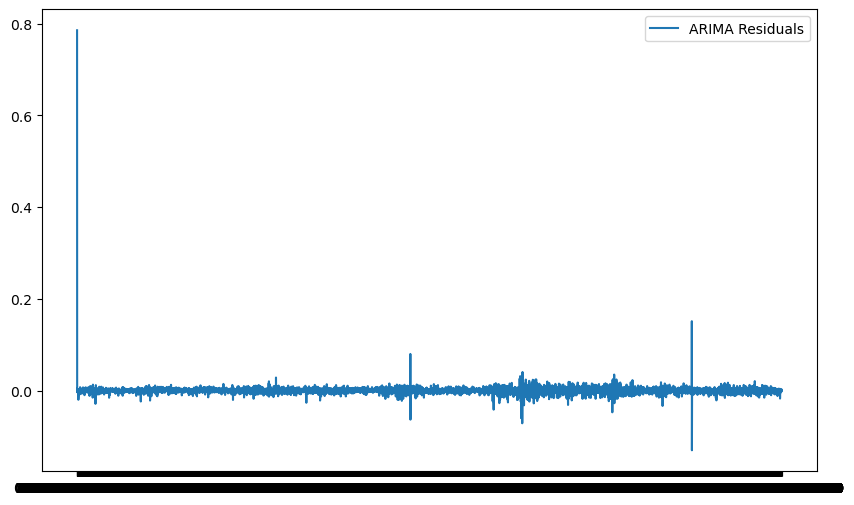

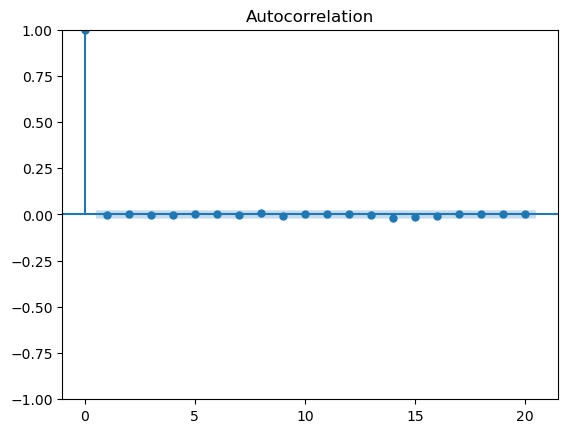

In [15]:
residuals = arima_result.resid
plt.figure(figsize=(10,6))
plt.plot(residuals, label='ARIMA Residuals')
plt.legend()
plt.show()

# Check residual ACF
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=20)
plt.show()


#### Forecasting with ARIMA

C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


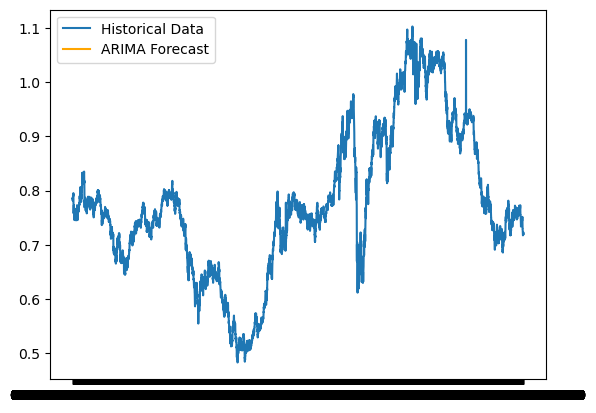

In [17]:
forecast_arima = arima_result.forecast()
plt.plot(df['Ex_rate'], label='Historical Data')
plt.plot(forecast_arima, label='ARIMA Forecast', color='orange')
plt.legend()
plt.show()


### Exponential Smoothing Model Building

C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


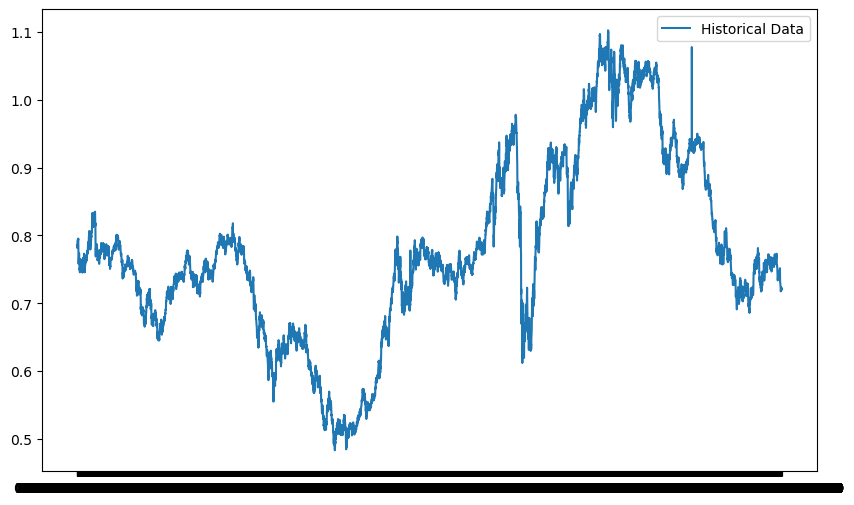

In [18]:
# Fit the Exponential Smoothing model (adjust trend and seasonality as needed)
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
es_result = model_es.fit()
ypred_es = es_result.predict(start =1791, end = 1820)
# Forecasting
forecast_es = es_result.forecast(steps=30)
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'], label='Historical Data')
# plt.plot(forecast_es, label='Exponential Smoothing Forecast', color='green')
# plt.plot(forecast_es)
plt.legend()
plt.show()


In [19]:
ypred_es

date
27-11-1994 00:00    0.777207
28-11-1994 00:00    0.777848
29-11-1994 00:00    0.776471
30-11-1994 00:00    0.774694
01-12-1994 00:00    0.774629
02-12-1994 00:00    0.774091
03-12-1994 00:00    0.782851
04-12-1994 00:00    0.780011
05-12-1994 00:00    0.766665
06-12-1994 00:00    0.764534
07-12-1994 00:00    0.763674
08-12-1994 00:00    0.764284
09-12-1994 00:00    0.763418
10-12-1994 00:00    0.758655
11-12-1994 00:00    0.759882
12-12-1994 00:00    0.758530
13-12-1994 00:00    0.760957
14-12-1994 00:00    0.760656
15-12-1994 00:00    0.761441
16-12-1994 00:00    0.761655
17-12-1994 00:00    0.758103
18-12-1994 00:00    0.753329
19-12-1994 00:00    0.751603
20-12-1994 00:00    0.748882
21-12-1994 00:00    0.750106
22-12-1994 00:00    0.750400
23-12-1994 00:00    0.749587
24-12-1994 00:00    0.751798
25-12-1994 00:00    0.752252
26-12-1994 00:00    0.750824
dtype: float64

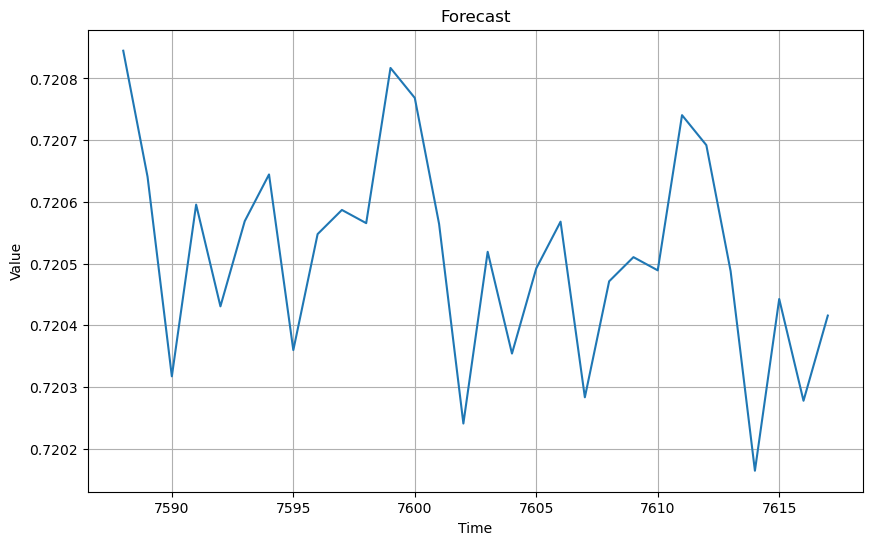

In [20]:
plt.figure(figsize=(10,6))
plt.plot(forecast_es)
plt.title('Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


### Model Evaluation and Comparison

In [22]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [23]:
model = ARIMA(train['Ex_rate'], order=(1, 1,0)).fit()
ypred = model.predict(start =1791, end = 1820)
ypred


C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alphabet\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


date
27-11-1994 00:00    0.776963
28-11-1994 00:00    0.777829
29-11-1994 00:00    0.776698
30-11-1994 00:00    0.775024
01-12-1994 00:00    0.774366
02-12-1994 00:00    0.774213
03-12-1994 00:00    0.782709
04-12-1994 00:00    0.780093
05-12-1994 00:00    0.766910
06-12-1994 00:00    0.764132
07-12-1994 00:00    0.763566
08-12-1994 00:00    0.764281
09-12-1994 00:00    0.763184
10-12-1994 00:00    0.758659
11-12-1994 00:00    0.759997
12-12-1994 00:00    0.758911
13-12-1994 00:00    0.760697
14-12-1994 00:00    0.760826
15-12-1994 00:00    0.761321
16-12-1994 00:00    0.761574
17-12-1994 00:00    0.758387
18-12-1994 00:00    0.753124
19-12-1994 00:00    0.751445
20-12-1994 00:00    0.748869
21-12-1994 00:00    0.749802
22-12-1994 00:00    0.750434
23-12-1994 00:00    0.749805
24-12-1994 00:00    0.752131
25-12-1994 00:00    0.752066
26-12-1994 00:00    0.750958
Name: predicted_mean, dtype: float64

In [24]:
# Calculate Error Metrics for both models
actual_values = df['Ex_rate'][-30:]  # assuming last 30 points for testing
# ARIMA Errors
mae_arima = mean_absolute_error(actual_values, ypred_ar)
rmse_arima = np.sqrt(mean_squared_error(actual_values, ypred_ar))

# Exponential Smoothing Errors
mae_es = mean_absolute_error(actual_values, ypred_es)
rmse_es = np.sqrt(mean_squared_error(actual_values, ypred_es))

# Print Errors
print("ARIMA MAE:", mae_arima, "RMSE:", rmse_arima)
print("Exponential Smoothing MAE:", mae_es, "RMSE:", rmse_es)


ARIMA MAE: 0.029894198958928055 RMSE: 0.03061992918377736
Exponential Smoothing MAE: 0.02989660684265775 RMSE: 0.030618818358416774


### Conclusion
Both ARIMA and Exponential Smoothing models exhibit almost identical performance, with very minor differences in MAE and RMSE values. Given the closeness of these metrics, neither model significantly outperforms the other in terms of forecast accuracy for this specific dataset. Here’s an interpretation:

1. **Forecast Accuracy**: The Exponential Smoothing model has a slight edge in terms of MAE and RMSE, but the difference is negligible (within a few decimal places). This implies that both models are well-suited to capture the underlying patterns in the exchange rate data.

2. **Model Choice**: Since both models perform similarly, the choice between ARIMA and Exponential Smoothing might depend on other factors, such as interpretability and computational efficiency. For example:
   - **ARIMA** could be preferable if there’s a need to interpret seasonality and trend in terms of AR and MA components.
   - **Exponential Smoothing (e.g., Holt-Winters)** might be more straightforward for time series data with strong seasonal patterns, as it directly incorporates trend and seasonality components.

3. **Recommendation**: Given that both models provide accurate results, either model could be used. However, Exponential Smoothing may offer a slightly simpler approach for future applications without losing accuracy.

### Final Insight
In practice, applying both models and averaging their forecasts could further enhance robustness. Given the close error metrics, it is advisable to focus on aspects like ease of implementation, future extensibility, and computational cost when selecting the final model for production.